# Midterm Output - Jala Ashan Abner
## this notebook contains some of the contributions made by Jala Ashan Abner pertaining to the AMI and race variables for the 2/12 UP221 Midterm Presentation.

## check the working directory

In [1]:
pwd

'/home/jovyan/GIS-group/Group Assignments'

In [2]:
cd '/home/jovyan/GIS-group'

/home/jovyan/GIS-group


## import relevant packages

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

## import merged dataset: contains data on each LA neighborhood's demographics and AMI

In [4]:
LAneighborhood = pd.read_csv('data/merged/LAneighborhood_ascend.csv',
                                   dtype=
    {
        'tract':str
    })
LAneighborhood

,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,1197,06037980026,Angeles National Forest,NaN,0.0,11.0,1.0,10.0,9.0,8.0,1.0,0.0,0.0
1198,1198,06037980028,Westchester,NaN,0.0,11.0,2.0,9.0,3.0,2.0,1.0,0.0,0.0
1199,1199,06037980031,San Pedro,NaN,22.0,1748.0,709.0,1039.0,1029.0,649.0,256.0,32.0,92.0
1200,1200,06037980038,Baldwin Hills,NaN,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


## drop observations that have missing data

In [5]:
LAneighborhood_clean = LAneighborhood.dropna()

## identify top and bottom five AMI neighbohoods

In [6]:
top_bottom = pd.concat([LAneighborhood_clean.head(5), LAneighborhood_clean.tail(10)])
top_bottom

,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
1174,829,06037224320,Pico-Union,16471.0,1155.0,2962.0,2619.0,343.0,308.0,63.0,157.0,11.0,66.0
1175,1015,06037265306,Westwood,15417.0,496.0,2081.0,364.0,1717.0,1590.0,886.0,92.0,2.0,593.0
1176,813,06037221820,University Park,13630.0,957.0,2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
1177,638,06037206202,Little Tokyo,12344.0,1195.0,3035.0,776.0,2259.0,2147.0,626.0,526.0,64.0,894.0
1178,649,06037207307,Downtown,12283.0,1142.0,1160.0,221.0,939.0,837.0,360.0,335.0,7.0,113.0


## isolate the top and bottom five neighborhoods

In [7]:
test = LAneighborhood_clean[LAneighborhood_clean['tract'].isin(['06037141700', '06037262100', '06037262400', '06037262303','06037980019', '06037206303', '06037207304', '06037224320', '06037242600', '06037240307', '06037206202'])].reset_index()
test


,index,Unnamed: 0,tract,COMM,med_hh_income,med_hh_income_universe,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,0,413,06037141700,Sherman Oaks,250001.0,1242.0,3096.0,210.0,2886.0,2701.0,2386.0,69.0,2.0,226.0
1,1,989,06037262100,Bel Air,250001.0,1071.0,3195.0,171.0,3024.0,2855.0,2515.0,44.0,1.0,269.0
2,2,994,06037262400,Mandeville Canyon,250001.0,1101.0,3242.0,215.0,3027.0,2879.0,2620.0,43.0,4.0,194.0
3,3,993,06037262303,Brentwood,250001.0,1063.0,3157.0,166.0,2991.0,2844.0,2587.0,49.0,0.0,196.0
4,4,1191,06037980019,Palisades Highlands,250001.0,37.0,128.0,26.0,102.0,90.0,80.0,5.0,0.0,5.0
5,1173,980,06037242600,Watts,16662.0,1381.0,4794.0,3142.0,1652.0,1574.0,29.0,1517.0,6.0,11.0
6,1174,829,06037224320,Pico-Union,16471.0,1155.0,2962.0,2619.0,343.0,308.0,63.0,157.0,11.0,66.0
7,1177,638,06037206202,Little Tokyo,12344.0,1195.0,3035.0,776.0,2259.0,2147.0,626.0,526.0,64.0,894.0
8,1179,646,06037207304,Downtown,11430.0,1698.0,2124.0,688.0,1436.0,1291.0,621.0,450.0,11.0,184.0
9,1183,641,06037206303,Wholesale District,4918.0,564.0,2858.0,1019.0,1839.0,1746.0,559.0,1043.0,56.0,48.0


## import additional packages for visualization

In [8]:
# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [9]:
test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   index                                                       10 non-null     int64  
 1   Unnamed: 0                                                  10 non-null     int64  
 2   tract                                                       10 non-null     object 
 3   COMM                                                        10 non-null     object 
 4   med_hh_income                                               10 non-null     float64
 5   med_hh_income_universe                                      10 non-null     float64
 6   Total Population                                            10 non-null     float64
 7   Total Hispanic/Latine Population                            10 non-null     float64
 8   Tot

## plot the highest and lowest AMI neighborhoods 

In [11]:
ax = px.bar(test,
        x = 'COMM',
       y='med_hh_income',
            title = 'Highest and Lowest AMI Neighborhoods - Los Angeles',
           labels={
            'COMM':'Los Angeles Neighborhood',
            'med_hh_income':'Median HH Income'})
ax.show

<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Los Angeles Neighborhood=%{x}<br>Median HH Income=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Sherman Oaks', 'Bel Air', 'Mandeville Canyon', 'Brentwood',
                          'Palisades Highlands', 'Watts', 'Pico-Union', 'Little Tokyo',
                          'Downtown', 'Wholesale District'], dtype=object),
              'xaxis': 'x',
              'y': array([250001., 250001., 250001., 250001., 250001.,  16662.,  16471.,  12344.,
                           11430.,   4918.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend'

## import 'neighborhood_IncRace' dataset

In [12]:
neighborhood_IncRace = pd.read_csv('data/merged/neighborhood_IncRace.csv',
                                   dtype=
    {
        'tract':str
    })

In [13]:
neighborhood_IncRace.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91597 entries, 0 to 91596
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  91597 non-null  int64  
 1   OBJECTID                                                    91597 non-null  int64  
 2   State                                                       91597 non-null  int64  
 3   COUNTY                                                      91597 non-null  int64  
 4   CT20                                                        91597 non-null  int64  
 5   BG20                                                        91597 non-null  int64  
 6   CB20                                                        91597 non-null  int64  
 7   CTCB20                                                      91597 non-null  int64  
 

## import AMI dataset

In [14]:
tracts = gpd.read_file('data/raw/MedianIncome.geojson')

In [15]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tract                   2495 non-null   object  
 1   med_hh_income           2458 non-null   float64 
 2   med_hh_income_universe  2495 non-null   int64   
 3   ami_category            2458 non-null   object  
 4   below_med_income        2458 non-null   object  
 5   below_60pct_med_income  2458 non-null   object  
 6   below_moderate_income   2458 non-null   object  
 7   sup_dist                2495 non-null   object  
 8   csa                     2495 non-null   object  
 9   spa                     2495 non-null   object  
 10  ESRI_OID                2495 non-null   int64   
 11  Shape__Area             2495 non-null   float64 
 12  Shape__Length           2495 non-null   float64 
 13  geometry                2495 non-null   geometry
dtypes: float64(3), g

In [16]:
test = tracts[tracts['tract'].isin(['06037141700', '06037262100', '06037262400', '06037262303','06037980019', '06037262507', '06037194300', '06037261104', '06037139705', '0603726231', '06037194300', '06037261104', '06037139705', '06037207304','06037206301', '06037224702','06037206302', '06037206303', '06037224320', '06037265306', '06037221820', '06037206202', '06037207307']) ]
test


,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
135,06037206202,12344.0,1195,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Little Tokyo,SPA 4 - Metro,2482,4.114009e+06,9646.074276,"POLYGON ((-118.24290 34.04607, -118.24273 34.0..."
136,06037206301,11153.0,1138,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2483,1.467235e+06,4941.872097,"POLYGON ((-118.24901 34.04460, -118.24758 34.0..."
137,06037206302,7193.0,640,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2484,4.836532e+05,3603.263688,"POLYGON ((-118.24740 34.04114, -118.24617 34.0..."
138,06037206303,4918.0,564,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2485,4.692073e+06,10612.528556,"POLYGON ((-118.24525 34.04226, -118.24390 34.0..."
143,06037207304,11430.0,1698,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Downtown,SPA 4 - Metro,2490,5.414463e+05,3459.976863,"POLYGON ((-118.25338 34.04522, -118.25204 34.0..."
146,06037207307,12283.0,1142,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Downtown,SPA 4 - Metro,2493,5.271600e+05,2910.616691,"POLYGON ((-118.24964 34.04739, -118.24855 34.0..."
624,06037221820,13630.0,957,Extremely Low Income,Yes,Yes,Yes,District 2,Los Angeles - University Park,SPA 6 - South,2971,2.200174e+06,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0..."
766,06037224320,16471.0,1155,Extremely Low Income,Yes,Yes,Yes,District 1,Los Angeles - Pico-Union,SPA 4 - Metro,3113,3.148560e+06,8337.933606,"POLYGON ((-118.28411 34.03986, -118.28194 34.0..."
771,06037224702,9722.0,714,Extremely Low Income,Yes,Yes,Yes,District 2,Los Angeles - University Park,SPA 6 - South,3118,4.249936e+06,9717.867464,"POLYGON ((-118.28397 34.02743, -118.28176 34.0..."
1301,06037261104,217396.0,633,Above Moderate Income,No,No,No,District 3,Los Angeles - Beverly Crest,SPA 5 - West,3648,4.958028e+07,40730.726149,"POLYGON ((-118.41755 34.10790, -118.41609 34.1..."


## import LA city boundary to prepare to clip county data

In [17]:
cityLA = gpd.read_file('data/raw/City_Boundary.geojson')
cityLA

,OBJECTID,CITY,geometry
0,1,IN,"POLYGON ((-118.42000 34.32917, -118.41999 34.3..."


## clip dataset so that the all observations are LA proper

In [18]:
clipped = gpd.clip(tracts, cityLA)
clipped

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
1816,06037276606,77143.0,1782,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4163,2.360108e+06,7249.355994,"POLYGON ((-118.43936 33.95777, -118.43857 33.9..."
1815,06037276605,79750.0,1386,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,4162,2.509882e+06,7961.153762,"POLYGON ((-118.43531 33.95968, -118.43404 33.9..."
1818,06037276608,98000.0,1154,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4165,3.821364e+06,8504.297988,"POLYGON ((-118.42847 33.95972, -118.42496 33.9..."
1824,06037278102,153654.0,1502,Above Moderate Income,No,No,No,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,4171,1.624911e+07,24720.607780,"POLYGON ((-118.45131 33.96424, -118.43358 33.9..."
1814,06037276601,131905.0,1646,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,4161,2.414852e+07,23190.228602,"POLYGON ((-118.44502 33.96166, -118.44307 33.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,06037103300,113568.0,1259,Above Moderate Income,No,No,No,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,2751,6.602468e+07,37007.098021,"POLYGON ((-118.37121 34.26033, -118.36930 34.2..."
2092,06037980021,NaN,14,None,None,None,None,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,4439,7.508840e+07,50381.103471,"POLYGON ((-118.40042 34.27136, -118.39772 34.2..."
539,06037104124,71000.0,1282,Low Income,Yes,No,Yes,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,2886,4.795336e+07,37473.814135,"MULTIPOLYGON (((-118.38569 34.28210, -118.3829..."
563,06037106113,99952.0,973,Above Moderate Income,No,No,No,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,2910,1.556154e+07,19777.673775,"POLYGON ((-118.42783 34.31545, -118.42434 34.3..."


## merge neighborhood data in again

In [19]:
merged=clipped.merge(LAneighborhood,on="tract")
merged

,tract,med_hh_income_x,med_hh_income_universe_x,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,...,med_hh_income_y,med_hh_income_universe_y,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,06037276606,77143.0,1782,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,...,77143.0,1782.0,3353.0,464.0,2889.0,2661.0,2072.0,167.0,8.0,387.0
1,06037276605,79750.0,1386,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,...,79750.0,1386.0,2093.0,312.0,1781.0,1618.0,1228.0,119.0,2.0,241.0
2,06037276608,98000.0,1154,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,...,98000.0,1154.0,2106.0,359.0,1747.0,1597.0,1132.0,143.0,3.0,294.0
3,06037278102,153654.0,1502,Above Moderate Income,No,No,No,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,...,153654.0,1502.0,2958.0,362.0,2596.0,2400.0,2088.0,100.0,3.0,175.0
4,06037276601,131905.0,1646,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,...,131905.0,1646.0,4058.0,559.0,3499.0,3222.0,2411.0,211.0,14.0,552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,06037103300,113568.0,1259,Above Moderate Income,No,No,No,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,...,113568.0,1259.0,3953.0,860.0,3093.0,2975.0,2650.0,53.0,5.0,233.0
1197,06037980021,NaN,14,None,None,None,None,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,...,NaN,14.0,56.0,20.0,36.0,27.0,14.0,3.0,0.0,10.0
1198,06037104124,71000.0,1282,Low Income,Yes,No,Yes,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,...,71000.0,1282.0,4333.0,2210.0,2123.0,2016.0,1319.0,387.0,0.0,257.0
1199,06037106113,99952.0,973,Above Moderate Income,No,No,No,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,...,99952.0,973.0,3939.0,3001.0,938.0,889.0,509.0,86.0,9.0,274.0


In [20]:
merged.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 26 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   tract                                                       1201 non-null   object  
 1   med_hh_income_x                                             1183 non-null   float64 
 2   med_hh_income_universe_x                                    1201 non-null   int64   
 3   ami_category                                                1183 non-null   object  
 4   below_med_income                                            1183 non-null   object  
 5   below_60pct_med_income                                      1183 non-null   object  
 6   below_moderate_income                                       1183 non-null   object  
 7   sup_dist                                                    1201 non-n

## set the CRS

In [21]:
merged.set_crs('epsg:4326')

,tract,med_hh_income_x,med_hh_income_universe_x,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,...,med_hh_income_y,med_hh_income_universe_y,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,06037276606,77143.0,1782,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,...,77143.0,1782.0,3353.0,464.0,2889.0,2661.0,2072.0,167.0,8.0,387.0
1,06037276605,79750.0,1386,Low Income,Yes,No,Yes,District 2,Los Angeles - Westchester,SPA 5 - West,...,79750.0,1386.0,2093.0,312.0,1781.0,1618.0,1228.0,119.0,2.0,241.0
2,06037276608,98000.0,1154,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,...,98000.0,1154.0,2106.0,359.0,1747.0,1597.0,1132.0,143.0,3.0,294.0
3,06037278102,153654.0,1502,Above Moderate Income,No,No,No,District 2,Los Angeles - Playa Del Rey,SPA 5 - West,...,153654.0,1502.0,2958.0,362.0,2596.0,2400.0,2088.0,100.0,3.0,175.0
4,06037276601,131905.0,1646,Above Moderate Income,No,No,No,District 2,Los Angeles - Westchester,SPA 5 - West,...,131905.0,1646.0,4058.0,559.0,3499.0,3222.0,2411.0,211.0,14.0,552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,06037103300,113568.0,1259,Above Moderate Income,No,No,No,District 5,Los Angeles - Shadow Hills,SPA 2 - San Fernando,...,113568.0,1259.0,3953.0,860.0,3093.0,2975.0,2650.0,53.0,5.0,233.0
1197,06037980021,NaN,14,None,None,None,None,District 5,Los Angeles - Lakeview Terrace,SPA 2 - San Fernando,...,NaN,14.0,56.0,20.0,36.0,27.0,14.0,3.0,0.0,10.0
1198,06037104124,71000.0,1282,Low Income,Yes,No,Yes,District 5,Unincorporated - Kagel/Lopez Canyons,SPA 2 - San Fernando,...,71000.0,1282.0,4333.0,2210.0,2123.0,2016.0,1319.0,387.0,0.0,257.0
1199,06037106113,99952.0,973,Above Moderate Income,No,No,No,District 3,Los Angeles - Sylmar,SPA 2 - San Fernando,...,99952.0,973.0,3939.0,3001.0,938.0,889.0,509.0,86.0,9.0,274.0


## calculate the bounding box

In [22]:
bbox = merged.total_bounds

# print bounding box
print("Bounding Box:")
print('min longitude:', bbox[0])
print('min latitude:', bbox[1])
print('max longitude:', bbox[2])
print('max latitude:', bbox[3])

Bounding Box:
min longitude: -118.6681741097937
min latitude: 33.70404295314168
max longitude: -118.15536986710319
max latitude: 34.33731107839654


## plot AMI classification with basemap

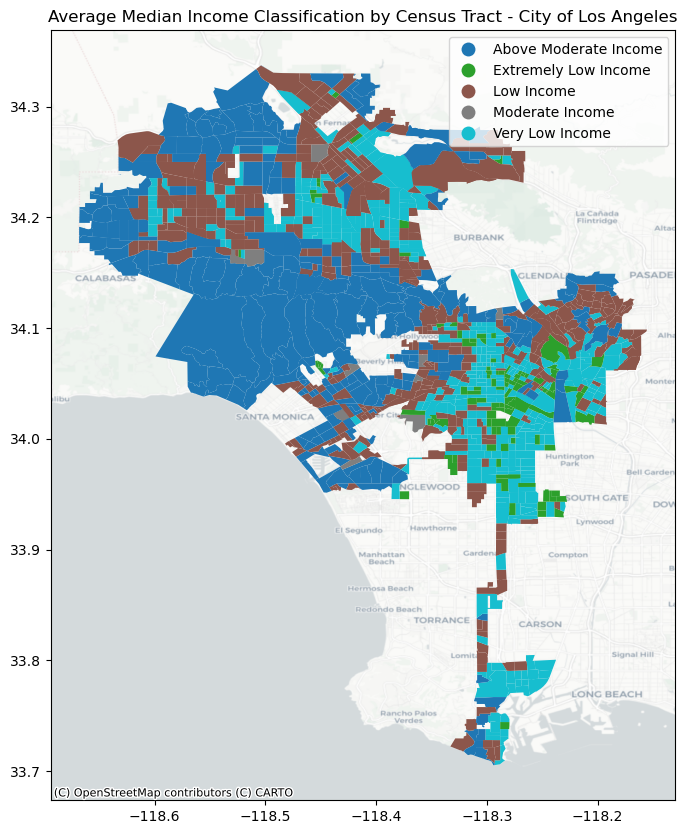

In [23]:
ax = merged.plot(figsize=(12,10),
         column='ami_category',
                 legend=True)
bounds = [-119,34,-118,35]
plt.title("Average Median Income Classification by Census Tract - City of Los Angeles")
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

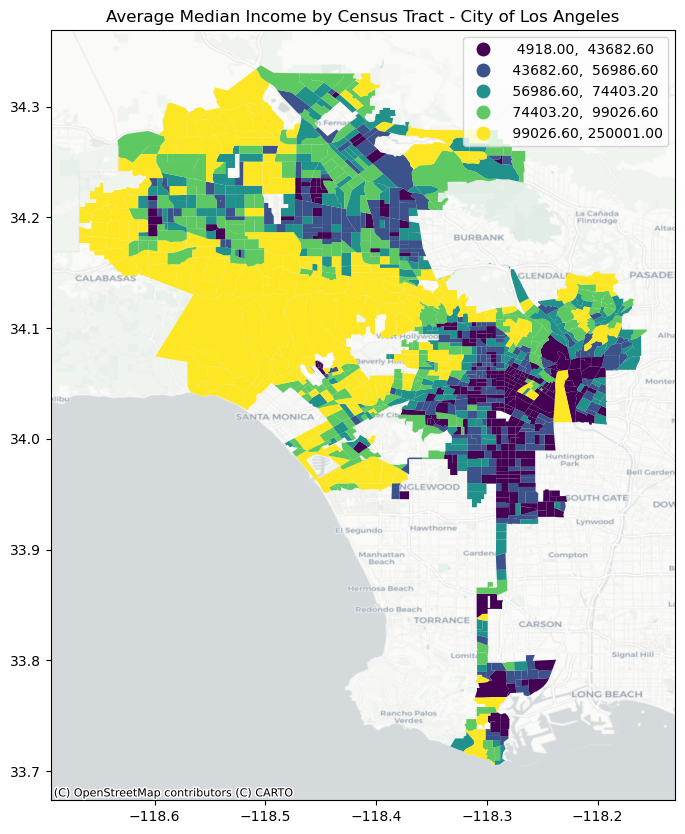

In [24]:
ay = clipped.plot(figsize=(12,10),
         column='med_hh_income',
                 legend=True,
            scheme='Quantiles')
plt.title("Average Median Income by Census Tract - City of Los Angeles")
bounds = [-119,34,-118,35]
ctx.add_basemap(ay, source=ctx.providers.CartoDB.Positron, crs=4326)